In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
#안 쓰는 컬럼 삭제
df.drop(columns=['title','release_time','director','time'], inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [8]:
#결측치 처리
df.fillna(0, inplace=True)

In [9]:
#distributor 카테고리 추가
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes 

In [10]:
#genre 카테고리 추가
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

In [11]:
#screening_rat 카테고리 추가
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
dtypes: category(3), float64(1), int16(1), int64(4), int8(2)
memory usage: 35.2 KB


In [13]:
#log 스케일 변환
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [14]:
df = pd.get_dummies(df, columns= ['genre_code'])
df = pd.get_dummies(df, columns= ['screening_rat_code'])

In [15]:
df = pd.get_dummies(df, columns = ['distributor_code'])

In [16]:
#불필요한 컬럼 삭제
df.drop(columns=['distributor','genre', 'screening_rat','dir_prev_bfnum','num_staff'], inplace=True)

In [17]:
#x, y 추려내기
y=df.box_off_num.to_numpy()
df.drop(columns=['box_off_num'], inplace=True)
x= df.to_numpy()

In [18]:
print(x.shape)
print(y.shape)

(600, 190)
(600,)


In [19]:
#데이터 나누기
i = int(len(x)*0.8)
train_x, test_x =x[:i],x[i:]
train_y, test_y =y[:i],y[i:]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                1910      
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


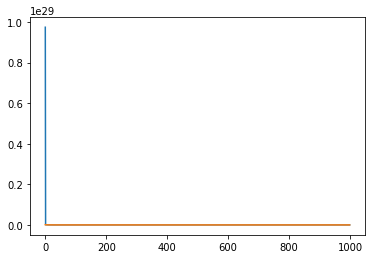

4/4 [==============================] - 0s 3ms/step - loss: 4806347849728.0000 - mape: 49456.8125
loss= 4806347849728.0
mape= 49456.8125


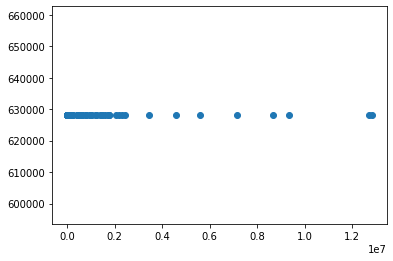

In [23]:
#딥러닝 학습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(190,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()